In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

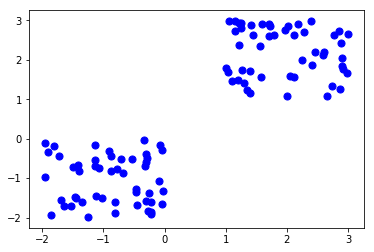

In [3]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [4]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
Kmean.cluster_centers_.shape

(2, 2)

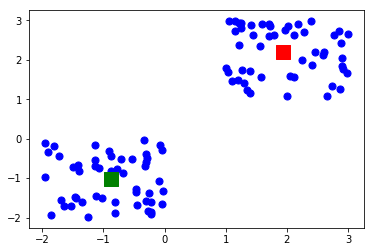

In [6]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.88322711, -1.03332415, s=200, c='g', marker='s')
plt.scatter(1.9368917, 2.18944465, s=200, c='r', marker='s')
plt.show()

In [7]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0], dtype=int32)

## K-Means Implementation

In [9]:
import uproot as upr

signal = upr.open("/home/theodore/Desktop/share/R21_A400_Z_vv_H250_yy_comb.root")["tree"]
background = upr.open("/home/theodore/Desktop/share/R21_background_comb.root")["tree"]

S = signal.pandas.df(["Vertex_sumpt2_php", "Vertex_sumpt2_Pileup", "metsig",
                      "N_j_central","diff_sumpt2", "mu", "npvx","dphij1met", 
                      "dphiyymet", "dphisjmet", "dphifjmet", "dphiyyj1",
                      "jets_rpt1", "jets_jvf1","jets_rpt2", "jets_jvf2",
                      "jets_rpt3", "jets_jvf3"])

B1 = background.pandas.df(["Vertex_sumpt2_php", "Vertex_sumpt2_Pileup", "metsig",
                           "N_j_central","diff_sumpt2", "mu", "npvx","dphij1met",
                           "dphiyymet", "dphisjmet", "dphifjmet", "dphiyyj1",
                           "jets_rpt1", "jets_jvf1", "jets_rpt2", "jets_jvf2",
                           "jets_rpt3", "jets_jvf3"])
S.shape, B1.shape

((16631, 18), (4167613, 18))

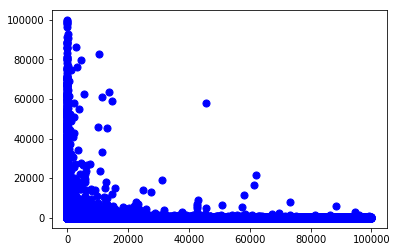

array([[  8.27769887e+02,   1.38954398e+02,   1.46111440e+00,
          8.81496207e-01,   6.88815489e+02,   3.08005650e+01,
          1.72234759e+01,   1.77215754e+00,   1.93576258e+00,
         -1.19656168e-01,   2.34508146e-01,   2.18270224e+00,
          5.06631260e-02,   1.16052228e-01,  -3.78770683e-01,
         -3.96832653e-01,  -6.74475927e-01,  -7.04436102e-01],
       [  3.01365566e+04,   1.22062592e+02,   1.45630467e+00,
          2.25636579e+00,   3.00144940e+04,   3.12155243e+01,
          1.74902802e+01,   1.66804134e+00,   1.70335773e+00,
          2.65420636e-02,   2.90376786e-01,   2.46918998e+00,
          5.77062541e-01,   7.74240794e-01,   2.03151605e-01,
          3.26346265e-01,  -1.63443473e-01,  -1.18407377e-01]])

In [23]:
# Data
from sklearn.utils import shuffle

data = pd.concat([S,B1],axis=0)
data1 = shuffle(data)
data1.reset_index(inplace=True, drop=True)
#data1.head(5)

# Visualize the first 2 columns of the data
plt.scatter(data1['Vertex_sumpt2_php'], data1['Vertex_sumpt2_Pileup'], s = 50, c = 'b')
plt.show()

# Specify K and fit the K-Means Algorithm to data
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=2, init='k-means++', max_iter=100, copy_x=True, 
               precompute_distances='auto', algorithm='auto')
Kmean.fit(data1)

# Obtain final cluster centroid positions
Kmean.cluster_centers_

# Plot the final clusters
# plt.scatter(data1['Vertex_sumpt2_php'], data1['Vertex_sumpt2_Pileup'], s =50, c='b')
# plt.scatter(C[0:0], C[0:1], s=200, c='g', marker='s')
# plt.scatter(C[1:0], C[1:1], s=200, c='r', marker='s')
# plt.show()

# # Get labels of data points in the clusters
# Kmean.labels_

# Predict cluster membership of data points
# sample_test=b
# second_test=sample_test.reshape(1, -1)
# Kmean.predict(second_test)

In [27]:
C = Kmean.cluster_centers_
C.shape

(2, 18)

In [ ]:
#Plot the final clusters
plt.scatter(data1['Vertex_sumpt2_php'], data1['Vertex_sumpt2_Pileup'], s =50, c='b')
plt.scatter(C[0:0], C[0:1], s=200, c='g', marker='s')
plt.scatter(C[1:0], C[1:1], s=200, c='r', marker='s')
plt.show()